In [31]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
# Load the data
# base_folder = "/Users/jasonchoi/Desktop/School/COSC420/evolutionary-poker/output/combination_75_0.8_0.2_8_5_3000"
base_folder = "/Users/jasonchoi/Desktop/School/COSC420/evolutionary-poker/output/combination_75_0.2_0.5_8_20_3000"
lineage_file = os.path.join(base_folder, "lineage_history/lineage_history.csv")
config_file = os.path.join(base_folder, "config.json")
data = pd.read_csv(lineage_file)
config = json.load(open(config_file, 'r'))

# Initialize graph
G = nx.DiGraph()

# Set up initial parameters
initial_population_count = config['POPULATION_SIZE']
current_lineages = {}
lineage_counter = 0
max_generation = config["GENERATIONS"]

# ---
# Step 1: Create initial population (generation -1)
initial_population = data[data['generation'] == f"generation_{-1}"]
for _, row in initial_population.iterrows():
    lineage_id = row['lineage']
    node_id = f"{lineage_id}_G-1"
    G.add_node(node_id, lineage=lineage_id, generation=-1, family_size=1, mutation=False)
    current_lineages[lineage_id] = node_id


In [32]:
for gen in range(0, max_generation + 1):
    generation_title = f"generation_{gen}"
    # filter by generation
    by_generation = data[data['generation'] == generation_title]
    # get unique lineages
    unique_lineage_id = by_generation['lineage'].unique()
    for lineage in unique_lineage_id:
        parent = current_lineages.get(lineage)
        lineage_pop = len(by_generation[by_generation['lineage'] == lineage])

        lineage_id = lineage
        node_id = f"{lineage_id}_G{gen}"
        
        # Check if this is the first instance of the lineage
        if lineage_id not in current_lineages:
            G.add_node(node_id, lineage=lineage_id, generation=gen, family_size=lineage_pop, mutation=True)
        else:
            G.add_node(node_id, lineage=lineage_id, generation=gen, family_size=lineage_pop, mutation=False)
        
        # Add edge from parent to child
        if parent and G.nodes[parent]['generation'] != gen:
            G.add_edge(parent, node_id)

        # Update current lineages
        current_lineages[lineage] = node_id


/var/folders/nq/mqys_h3n0z1clrnlkq60rks00000gn/T/ipykernel_41259/3829551655.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


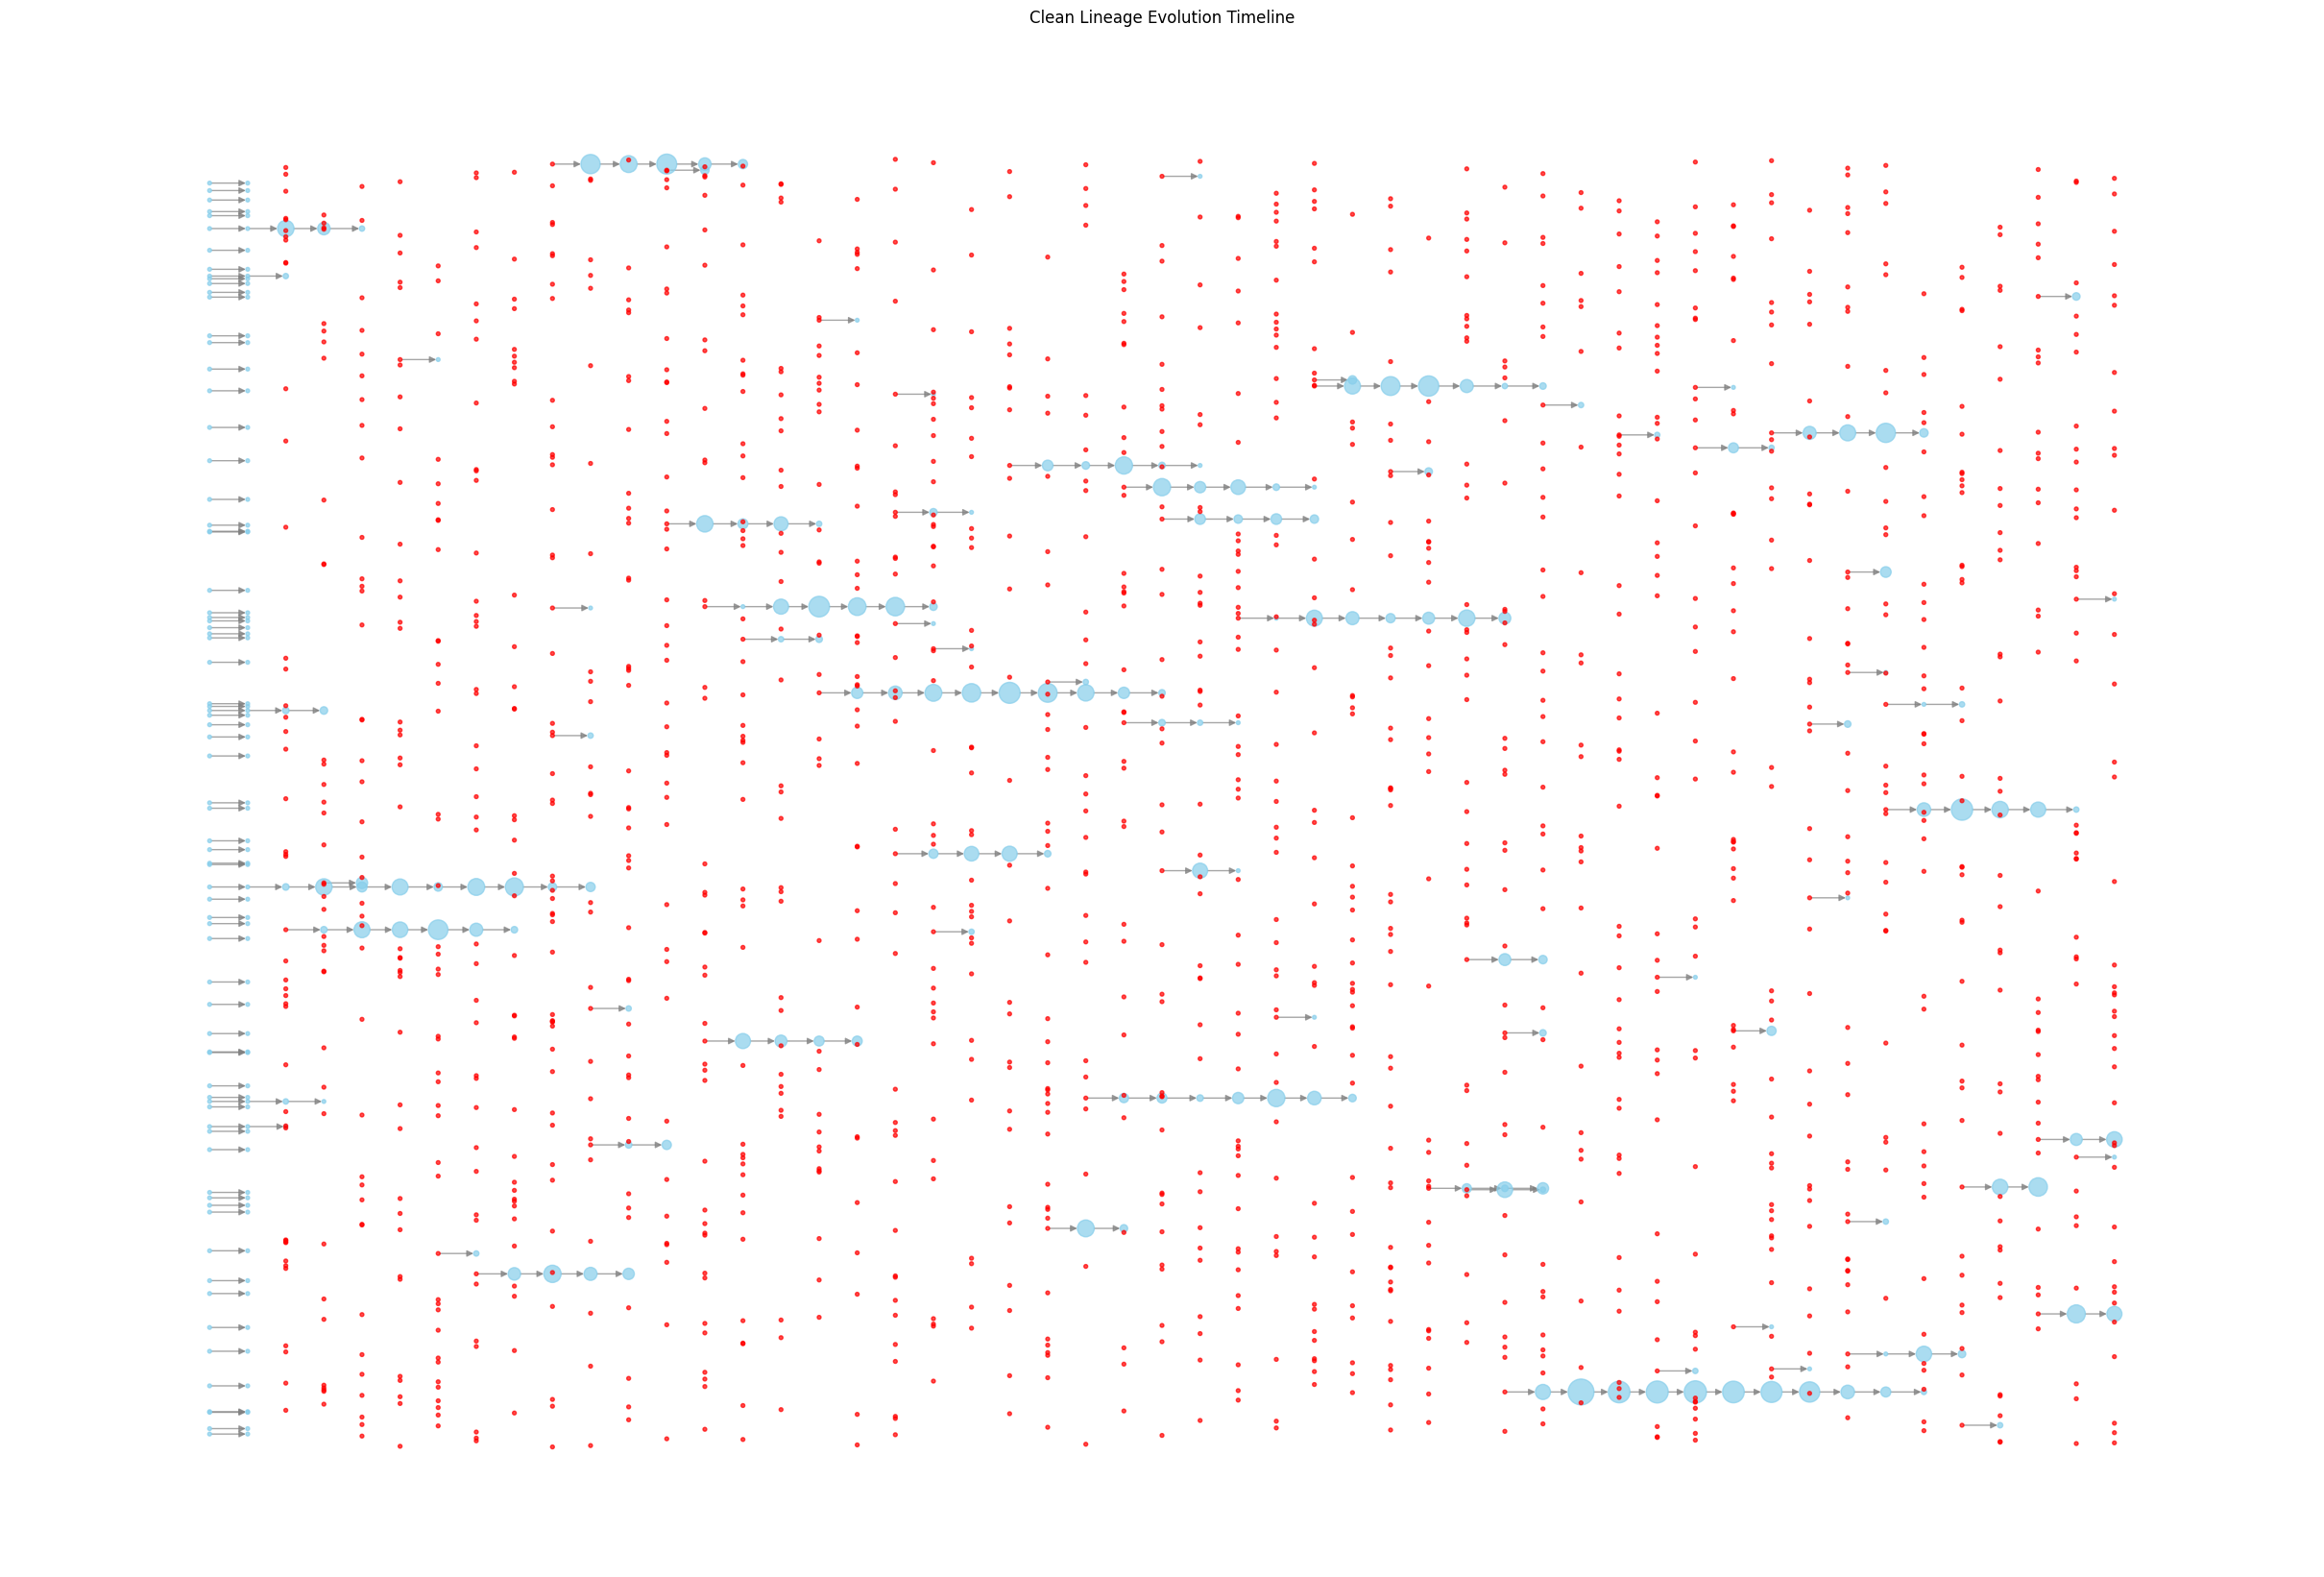

In [33]:
pos = {}
lineage_to_y = {lineage: idx for idx, lineage in enumerate(sorted(set(nx.get_node_attributes(G, 'lineage').values())))}

for node, data in G.nodes(data=True):
    lineage = data['lineage']
    generation = data['generation']
    pos[node] = (generation, lineage_to_y[lineage])

# Draw the graph
plt.figure(figsize=(24, 16))
node_sizes = [G.nodes[n]['family_size'] * 8 for n in G.nodes]
node_colors = ['red' if G.nodes[n]['mutation'] else 'skyblue' for n in G.nodes]

nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color='gray', alpha=0.7)
plt.title("Clean Lineage Evolution Timeline")
plt.xlabel("Generation")
plt.ylabel("Lineage ID (approx)")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/nq/mqys_h3n0z1clrnlkq60rks00000gn/T/ipykernel_41259/2411369993.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


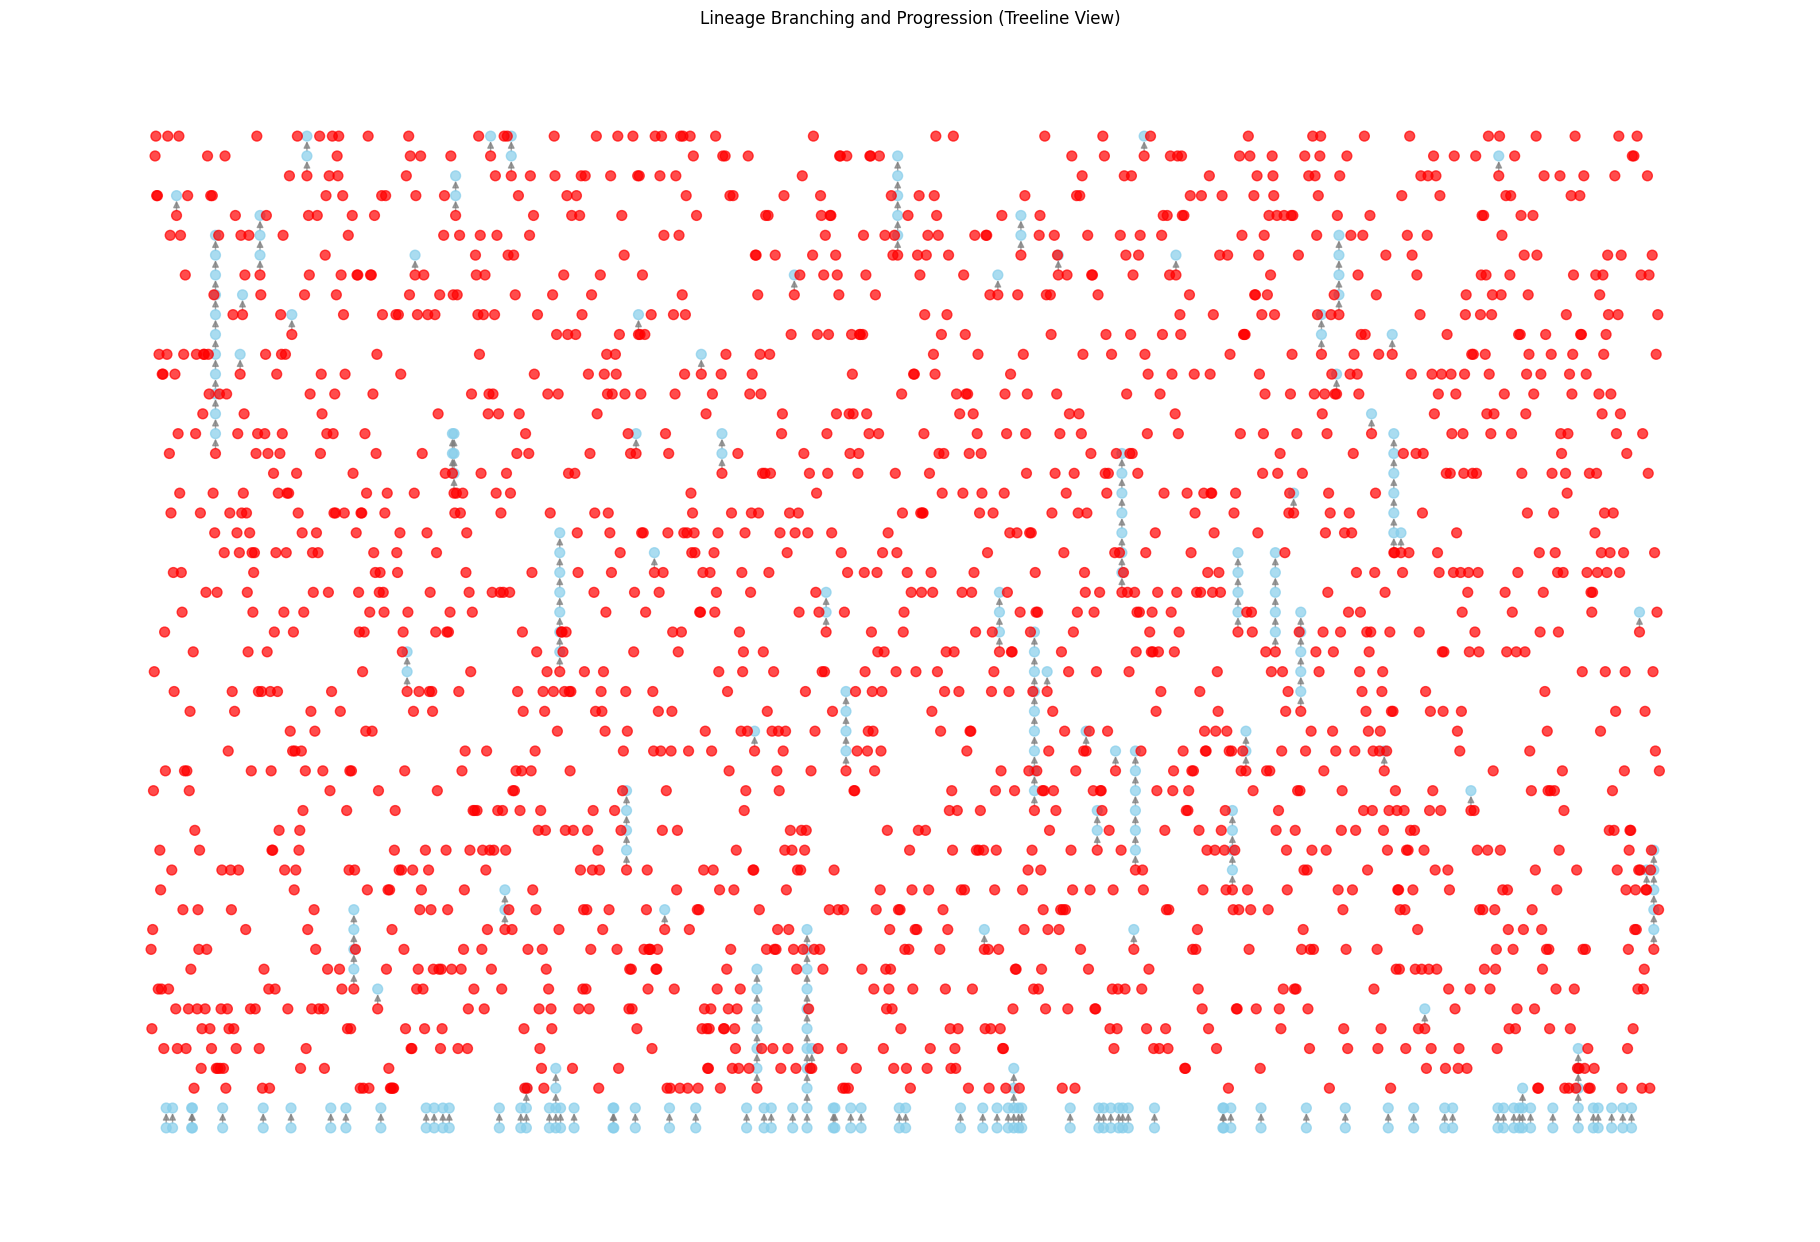

In [34]:
# Map each lineage to a fixed x-coordinate
lineage_to_x = {lineage: idx for idx, lineage in enumerate(sorted(set(nx.get_node_attributes(G, 'lineage').values())))}

# Position nodes: x = lineage position, y = generation
pos = {}
for node, data in G.nodes(data=True):
    lineage = data['lineage']
    generation = data['generation']
    pos[node] = (lineage_to_x[lineage], generation)

# Draw the graph
plt.figure(figsize=(18, 12))

# Nodes: constant size now
node_sizes = [50 for _ in G.nodes]

# Color: still red if mutation, blue otherwise
node_colors = ['red' if G.nodes[n]['mutation'] else 'skyblue' for n in G.nodes]

nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color='gray', alpha=0.7)

plt.title("Lineage Branching and Progression (Treeline View)")
plt.xlabel("Lineage ID (approx)")
plt.ylabel("Generation")
plt.grid(True)
plt.tight_layout()
plt.show()
